<a href="https://colab.research.google.com/github/spangudw/fake-real-news-dataset/blob/main/Fake_and_Real_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd.read_csv('https://raw.githubusercontent.com/spangudw/fake-real-news-dataset/main/Fake.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

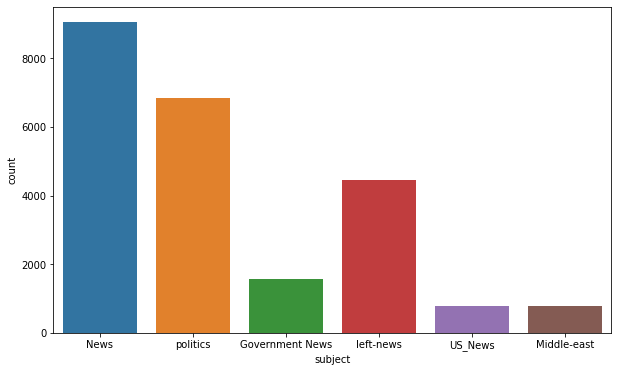

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'subject',data=fake)

## Worldcloud

In [8]:
text = ' '.join(fake['text'].tolist())

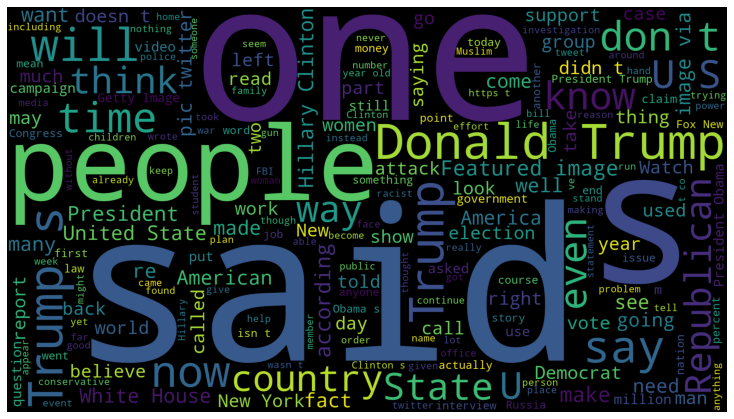

In [9]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Exploring Real news

In [10]:
real = pd.read_csv('https://raw.githubusercontent.com/spangudw/fake-real-news-dataset/main/True.csv')

In [11]:
text = ' '.join(real['text'].tolist())

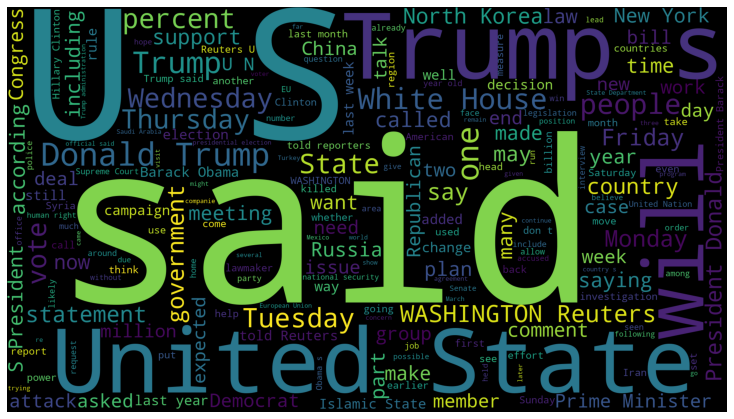

In [12]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
real.sample(5)

,title,text,subject,date
10274,U.S. general Lori Robinson to become first wom...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"March 18, 2016"
8561,Powerful Koch brothers rebuff big donors' call...,"COLORADO SPRINGS, Colo. (Reuters) - The billio...",politicsNews,"August 1, 2016"
2568,Trump gives Boy Scouts at jamboree a taste of ...,"GLEN JEAN, West Virginia (Reuters) - After ano...",politicsNews,"July 25, 2017"
2543,Sessions sets limits on U.S. federal funding f...,WASHINGTON (Reuters) - U.S. Attorney General J...,politicsNews,"July 25, 2017"
11450,"China closes more than 13,000 websites in past...",BEIJING (Reuters) - China has closed more than...,worldnews,"December 24, 2017"


In [14]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [15]:
len(unknown_publishers)

222

In [16]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [17]:
real = real.drop(8970, axis=0)

In [18]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [19]:
real['publisher']=publisher
real['text'] = tmp_text

In [20]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [21]:
real.shape

(21416, 5)

In [22]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [23]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [24]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [25]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

## Preprocessing Text

In [26]:
real['class'] = 1
fake['class'] = 0

In [27]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [28]:
real = real[['text', 'class']]

In [29]:
fake = fake[['text', 'class']]

In [30]:
data = real.append(fake, ignore_index=True)

In [31]:
data.sample(5)

,text,class
26626,trump’s right-hand man threatens ‘bloodbath’ ...,0
31026,zing! sarah sanders calls out sen. bob corker ...,0
42833,buried by media: aide to leftist us congressma...,0
20264,trump to visit florida on thursday in wake of ...,1
39740,obama’s doj let russian lawyer into u.s. witho...,0


In [32]:
def remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

Remove all special characters.

In [33]:
data['text'] = data['text'].apply(lambda x: remove_special_chars(x))

In [34]:
import gensim

In [35]:
y = data['class'].values

"""## Create list of list. (list of each word in news. list of news.)"""

In [36]:
X = [d.split() for d in data['text'].tolist()]

"""Word to Vector conversion.
*   Word2Vec : Class
*   Sentences : list
*   size : size of vector for each word
*   window :
*min_count : If there is single word in list, it will create vector for it.

"""

In [37]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [38]:
len(w2v_model.wv.vocab)

231872

In [39]:
t = Tokenizer()
t.fit_on_texts(X)

In [40]:
X = t.texts_to_sequences(X)

In [41]:
X_array = np.array([len(x) for x in X])
len(X_array[X_array>1000])

1581

In [42]:
max_words_in_news = 1000
X = pad_sequences(X, maxlen=max_words_in_news)

## increasing index by 1, for all others words apart from token_vocab.

In [43]:
vocab = t.word_index
vocab_size = len(vocab) + 1

In [44]:
len(vocab)

231872

In [45]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [46]:
embedding_vectors = get_weight_matrix(w2v_model)

In [47]:
embedding_vectors.shape

(231873, 100)

In [48]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=max_words_in_news, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [51]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 45s 51ms/step - loss: 0.1495 - acc: 0.9434 - val_loss: 0.1085 - val_acc: 0.9642
Epoch 2/6
737/737 [==============================] - 37s 50ms/step - loss: 0.0642 - acc: 0.9789 - val_loss: 0.0623 - val_acc: 0.9787
Epoch 3/6
737/737 [==============================] - 37s 51ms/step - loss: 0.0377 - acc: 0.9885 - val_loss: 0.0441 - val_acc: 0.9856
Epoch 4/6
737/737 [==============================] - 38s 52ms/step - loss: 0.0215 - acc: 0.9932 - val_loss: 0.0610 - val_acc: 0.9800
Epoch 5/6
737/737 [==============================] - 42s 57ms/step - loss: 0.0254 - acc: 0.9915 - val_loss: 0.0330 - val_acc: 0.9909
Epoch 6/6
737/737 [==============================] - 37s 51ms/step - loss: 0.0131 - acc: 0.9960 - val_loss: 0.0322 - val_acc: 0.9919


In [52]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)
accuracy_score(y_test, y_pred)

0.9928730512249443

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5892
           1       0.99      1.00      0.99      5333

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [56]:
x = ['this is a news']
x = t.texts_to_sequences(x)
x= pad_sequences(x, maxlen=max_words_in_news)

array([[0]])

In [65]:
x = ['Nagaland on Sunday reported four fresh COVID-19 cases, three more than the previous day, with the tally increasing to 35,870']
x = t.texts_to_sequences(x)
x= pad_sequences(x, maxlen=max_words_in_news)
(model.predict(x) >= 0.5).astype(int)

array([[1]])